# Mushroom-Classification

**In this project we will examine the data and create a machine learning algorithms that will detect if the mushroom is edible or poisonous by its specification using different classifiers** 

**Importing necessary libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
# Reading the csv file from dataset

df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In this dataset the class is the target variable and all the other columns are independent variables.

In [33]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Showing first 5 rows of the dataset. This dataset is comprised of completely categorical features

## EDA

In [34]:
df.shape

(8124, 23)

There are 8124 rows (i.e. instances of mushroom) and 23 columns (i.e. specification) in dataset.

In [35]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Here both dependent variable(target) and independent variables having the data type as object.

In [36]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

This shows how many columns are there in the dataset.

In [37]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null-values in the given dataset.

In [38]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Shows the number of unique values in each column.

In [39]:
df['class'].unique()

array(['p', 'e'], dtype=object)

**.unique()** gives the unique occurrence in the 'class' column. There are two unique values in df['class'].

That is the two classes of mushrooms are p-poisonous and e-edible.

In [40]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The edible and poisonous mushrooms have 4208 and 3916 counts respectively. So there are more edible mushrooms than poisonous mushrooms. Also the value count of 'class' column are not equal but almost balanced.

## Description of Dataset

In [41]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Here .describe() calculates the statistical data like count, unique, top, freq of the numerical values of the DataFrame. Which shows the number of poisonous and edible mushrooms in this dataset.

- **count** shows the number of responses.
- **unique** shows the number of categorical values.
- **top** shows the highest-occurring categorical value.
- **freq** shows the frequency/count of the highest-occurring categorical values.

# Data visualizaton 

## Univariate analysis

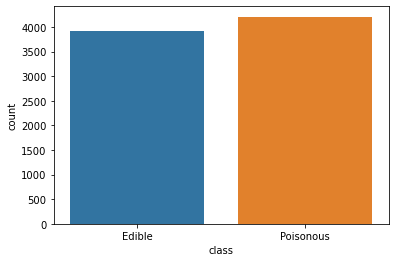

In [42]:
sns.countplot(df["class"]);
plt.xticks(np.arange(2),("Edible", "Poisonous"), rotation=0)
plt.show()

In this bar plot we are visualizing the number of poisonous and edible mushrooms. All two classes are nearly equal which is acceptable so,there is no class imbalancing issue exist. 


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

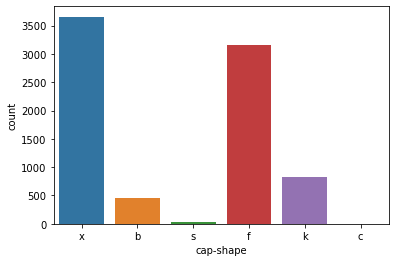

In [43]:
sns.countplot(df["cap-shape"])

This bar plot shows the mushrooms cap-shape types in the dataset. In this count plot we do not have data for conical shaped mushrooms. Only edible mushrooms have sunken(s) cap-shape. Only poisonous mushrooms have convex(x) cap-shape.

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

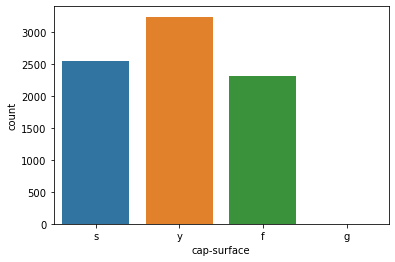

In [44]:
sns.countplot(df["cap-surface"])

This count plot shows the number of mushrooms cap-surface types in the dataset. Poisonous mushrooms have cap-surface with grooves(g).

<AxesSubplot:xlabel='cap-color', ylabel='count'>

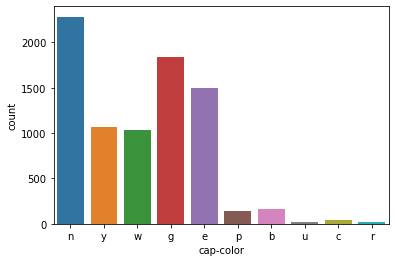

In [45]:
sns.countplot(df["cap-color"])

The count plot shows the mushrooms cap-color types in the dataset and the number of mushrooms which are edible or poisonous based on cap color. Here there are few purple(u), cinnamon(c) and green(r) mushrooms cap-color present. Only edible mushrooms have green or purple cap color.

<AxesSubplot:xlabel='odor', ylabel='count'>

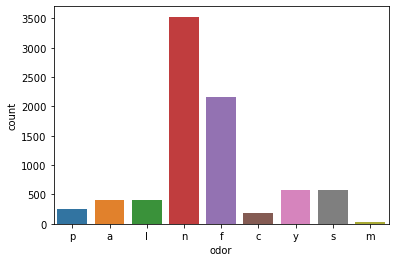

In [46]:
sns.countplot(df["odor"])

This count plot shows the number of mushhrooms based on the odor. Edible mushrooms only seem to have an almond(a), anise(l) or none(n). there are mushrooms they smell good but still they are poisonous. Here few poisonous mushrooms have almond or anise odor.

<AxesSubplot:xlabel='gill-color', ylabel='count'>

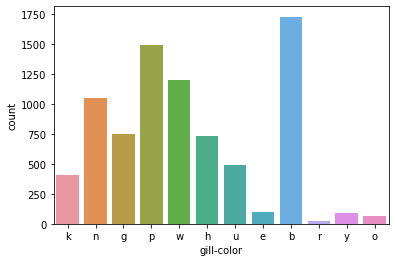

In [47]:
sns.countplot(df["gill-color"])

This count plot gives the number of mushrooms gill-color types like black(k), buff(b), chocolate(h) etc. Poisonous mushrooms have buff(b) or green(r) gill color and edible mushrooms have red(e) or orange(o) gill color.

<AxesSubplot:xlabel='habitat', ylabel='count'>

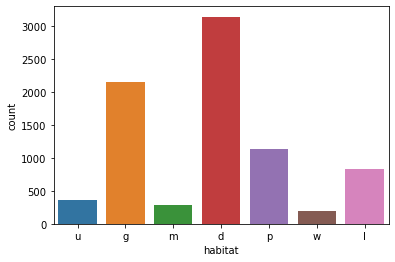

In [48]:
sns.countplot(df["habitat"])

This shows the number of mushrooms habitat types in the dataset.

Since the dataset is in categorical form so no need to check normal distribution and outliers.

## Encoding the Data

In [49]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.columns:
    df[column]=LE.fit_transform(df[column])

In [50]:
df["class"].unique()

array([1, 0])

In [51]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Using labelencoder we are converting all the columns from categorical form to numerical form.

Also we can observe that the column veil-type has all zero values so we can eliminate that column.

In [52]:
df=df.drop(["veil-type"],axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


Here we eliminated the veil-type column which is of no use.

## Correlation between the target variable and independent variables using HEAT map

In [53]:
cor = df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


**.corr** is used to find the pairwise correlation of all columns in the dataframe.

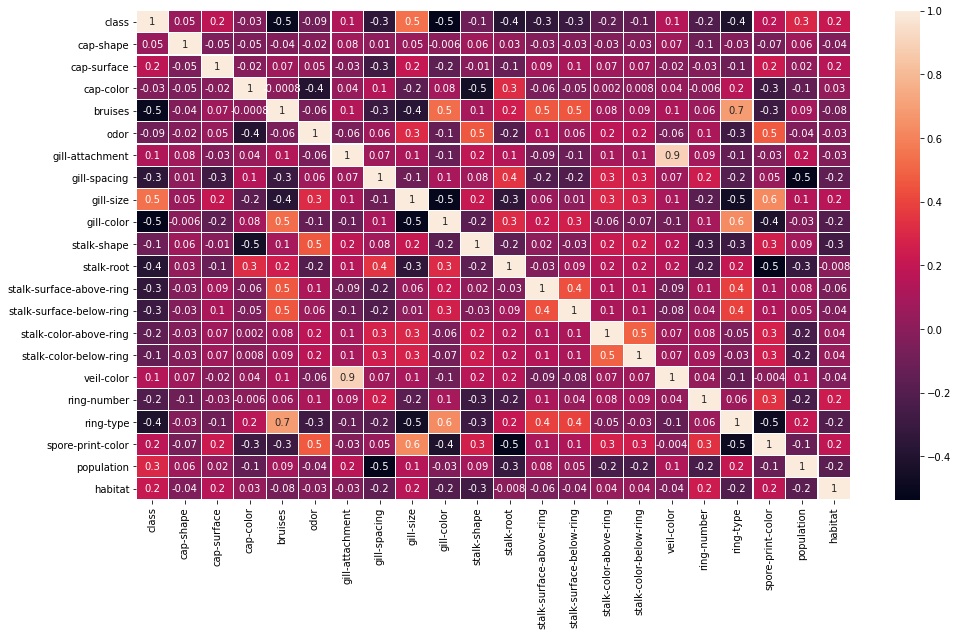

In [54]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='.1g', annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. That is the relation between one feature vs another feature also feature vs target.
- Light shades are highly correlated.
- Dark shades are very less correlated.
- gill-size and population have good correlation with the target variable.
- bruises and gill-color are highly negatively correlated with the target variable.
- veil-color is highly positively correlated with gill-attachment.

In [55]:
x=df.drop("class",axis=1)
y=df["class"]

## Finding the best random state

In [56]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


We observe that the Best accuracy is  1.0  on Random_state  1.

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State. 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## Decision Tree Classifier

In [59]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



We observe that the data is balanced and we need to check the accuracy score to predict the best model. DTC has accuracy 100%. 

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

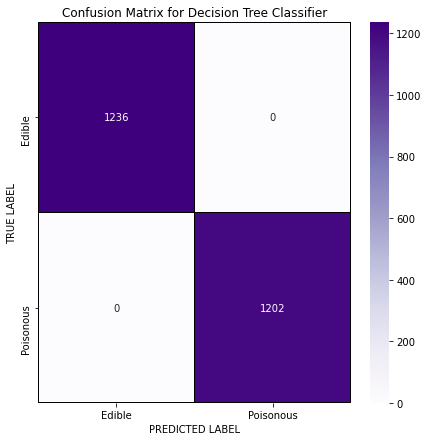

In [61]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

Confusion matrix for decision tree classifier.

## Random Forest Classifier

In [62]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



RFC has 100% accuracy.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

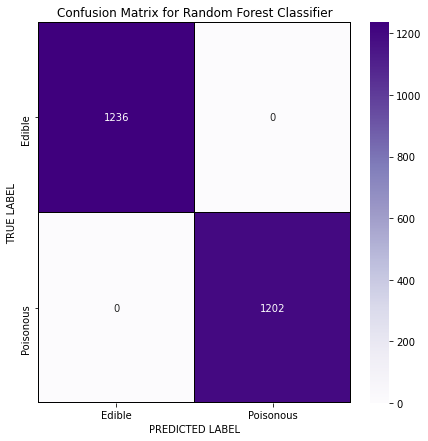

In [63]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

Confusion matrix for Random Forest Classifier.

## Support Vector Classifier

In [64]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



SVC has accuracy 99%.

Text(0.5, 1.0, 'Confusion Matrix for SVM Tree Classifier')

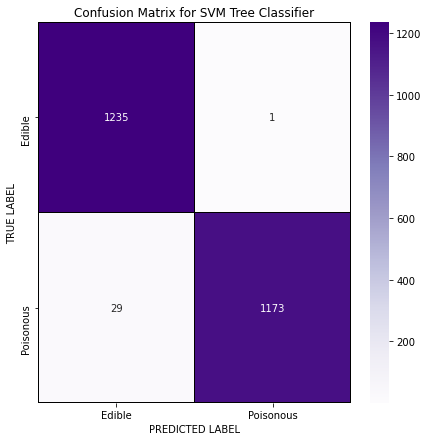

In [65]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Tree Classifier')

Confusion matrix for SVM Classifier

## Logistic Regression 

In [66]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1236
           1       0.96      0.94      0.95      1202

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



Logistic Regression has accuracy 95%

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

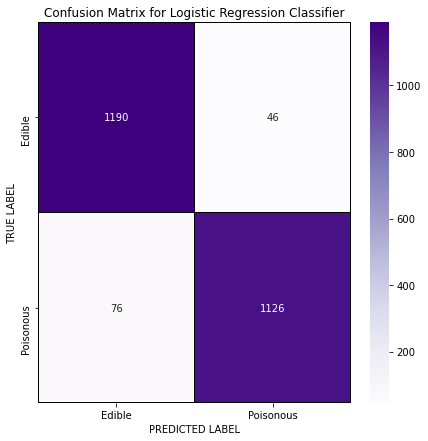

In [68]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

Confusion matrix for Logistic Regression Classifier

In [69]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



The accuray of KNN classifier is 100%

Text(0.5, 1.0, 'Confusion Matrix for KNN Classifier')

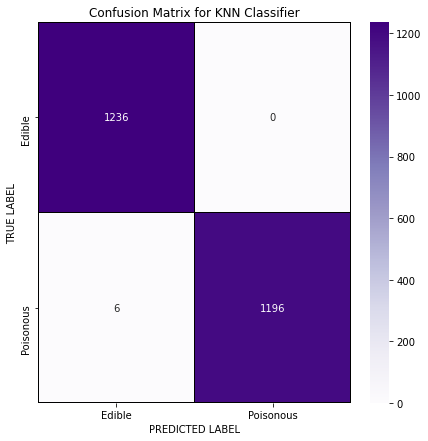

In [70]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')

Confusion matrics for KNN.

## Naive Bayes 

In [71]:
nb=GaussianNB ()
nb.fit(x_train,y_train)
pred=nb.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1236
           1       0.92      0.92      0.92      1202

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



Acuuracy of Naive Bayes is 92%.

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes  Classifier')

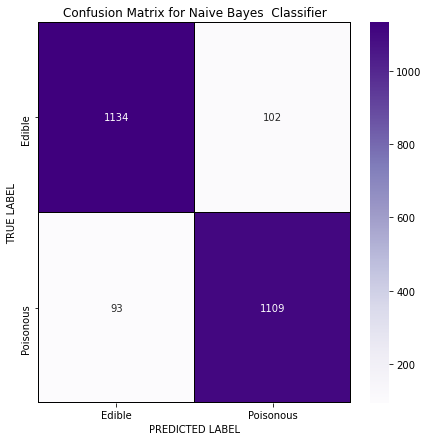

In [72]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes  Classifier')

Confusion matrix for Naive Bayes.

## Cheecking the Cross Validation Score

In [366]:
from sklearn.model_selection import cross_val_score

In [367]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9246460022735885


In [368]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9007583175445244


In [369]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8420306934444864


In [370]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8392256915498295


In [371]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.8815549071618036


In [372]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.7259685486926866


From the observation of accuracy and cross validation score we can predict that Decision Tree Classifier(DTC) is the best model.

## Hyper parameter tuning

In [374]:
from sklearn.model_selection import GridSearchCV

In [380]:
# Decision Tree Classifier
parameters = {'max_depth':np.arange(2,50),
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2']}

In [381]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [382]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [383]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 35, 'max_features': 'sqrt'}

This gives the best parameter value.

In [410]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth=35, max_features='sqrt')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


This final model gives the 100% accuracy.

## Plotting ROC and compare AUC using best model

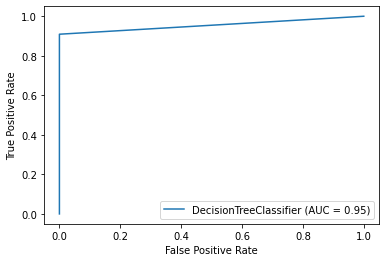

In [73]:
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=1)
df = DecisionTreeClassifier(random_state=1)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

Here we observe that the ROC curve is produced by calculating the false positive rate against the true positive rate for DTC. The AUC for DTC is 0.95 which is observed in the plot.

## Saving the model

In [412]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here saving the model ['FinalModle.pkl']